In [11]:
import pandas as pd  # for handling data like a table
from sklearn.model_selection import train_test_split  # to split data for training and testing
from sklearn.linear_model import LinearRegression  # for the linear regression model
from sklearn.metrics import mean_absolute_error, r2_score  # to evaluate how good our predictions are
from sklearn.impute import SimpleImputer  # to handle missing values
import matplotlib.pyplot as plt  # for creating plots
import seaborn as sns  # for prettier plots

In [13]:
data = pd.read_csv("charts.csv")
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330087 entries, 0 to 330086
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            330087 non-null  object 
 1   rank            330087 non-null  int64  
 2   song            330087 non-null  object 
 3   artist          330087 non-null  object 
 4   last-week       297775 non-null  float64
 5   peak-rank       330087 non-null  int64  
 6   weeks-on-board  330087 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 17.6+ MB


In [14]:
# Drop the 'date' column because it's not needed for our prediction
data.drop(['date'], axis=1, inplace=True)

In [15]:
# Convert 'artist' column to numeric values using a label encoder
data['artist'] = pd.factorize(data['artist'])[0]

# Print the cleaned dataset to check
print(data.head())

   rank           song  artist  last-week  peak-rank  weeks-on-board
0     1     Easy On Me       0        1.0          1               3
1     2           Stay       1        2.0          1              16
2     3  Industry Baby       2        3.0          1              14
3     4     Fancy Like       3        4.0          3              19
4     5     Bad Habits       4        5.0          2              18


In [16]:
# Check for missing values
print("Missing values before imputation:\n", data.isnull().sum())

Missing values before imputation:
 rank                  0
song                  0
artist                0
last-week         32312
peak-rank             0
weeks-on-board        0
dtype: int64


In [19]:
# Use SimpleImputer to fill missing values with the average (mean) of the column
imputer = SimpleImputer(strategy='mean')
X = data[['last-week', 'peak-rank', 'weeks-on-board', 'artist']]  # Features (the puzzle pieces)
y = data['rank']  # Target variable (what we want to predict)
X_imputed = imputer.fit_transform(X)

In [20]:
# Check again for missing values
print("Missing values after imputation:\n", pd.DataFrame(X_imputed).isnull().sum())

Missing values after imputation:
 0    0
1    0
2    0
3    0
dtype: int64


In [21]:
# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# X_train and y_train are used to teach the model
# X_test and y_test are used to test how well the model learned

In [22]:
# Create the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Use the model to predict the ranks for the test data
y_pred = model.predict(X_test)
# Now, we have the predicted ranks in y_pred, and we can compare them to the actual ranks (y_test)

array([54.53531114, 26.38188241, 17.99301527, ..., 65.16242507,
       14.2507015 , 81.48572709])

In [25]:
# Calculate Mean Absolute Error and R-squared score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Absolute Error: 9.401695860457892
R-squared: 0.8216217804411785


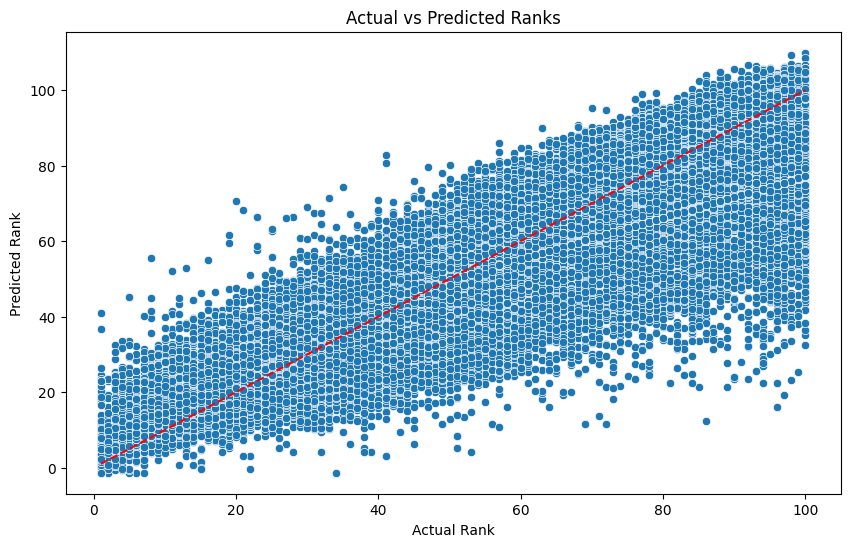

In [26]:
# Plotting Actual vs Predicted Ranks
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)

# Draw a red line showing where perfect predictions would be
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')

# Add labels and title
plt.xlabel('Actual Rank')
plt.ylabel('Predicted Rank')
plt.title('Actual vs Predicted Ranks')

# Show the plot
plt.show()